<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/cda-2021/blob/main/notebooks/cda_2021_05_18_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install two packages for the lecture

In [ ]:
install.packages("AER") 

In [3]:
install.packages("vcd")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(haven)
library(MASS) ## for glm.nb -- negative binomial
library(vcd)
#library(AER)

Loading required package: grid



In [6]:
df <- read_sas("baza2005.sas7bdat")
head(df)

ROK,NRG,MN,KLM,WOJ,LOS,DOCH,LOS_LT14,LOS_GE14,TG,DOCH_OS,DOCH_EQ
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2005,100010111,1486,1,02,3,2974.95,0,3,0,991.6500,1487.4750
2005,100010121,1444,1,02,2,1700.55,0,2,0,850.2750,1133.7000
2005,100010211,1444,1,02,2,821.56,0,2,0,410.7800,547.7067
2005,100010221,2603,1,02,1,1369.94,0,1,1,1369.9400,1369.9400
2005,100010222,1453,1,02,4,9801.88,2,2,0,2450.4700,4667.5619
2005,100010311,1453,1,02,4,2837.81,0,4,0,709.4525,1135.1240


Visualize the data -- variable LOS_LT14

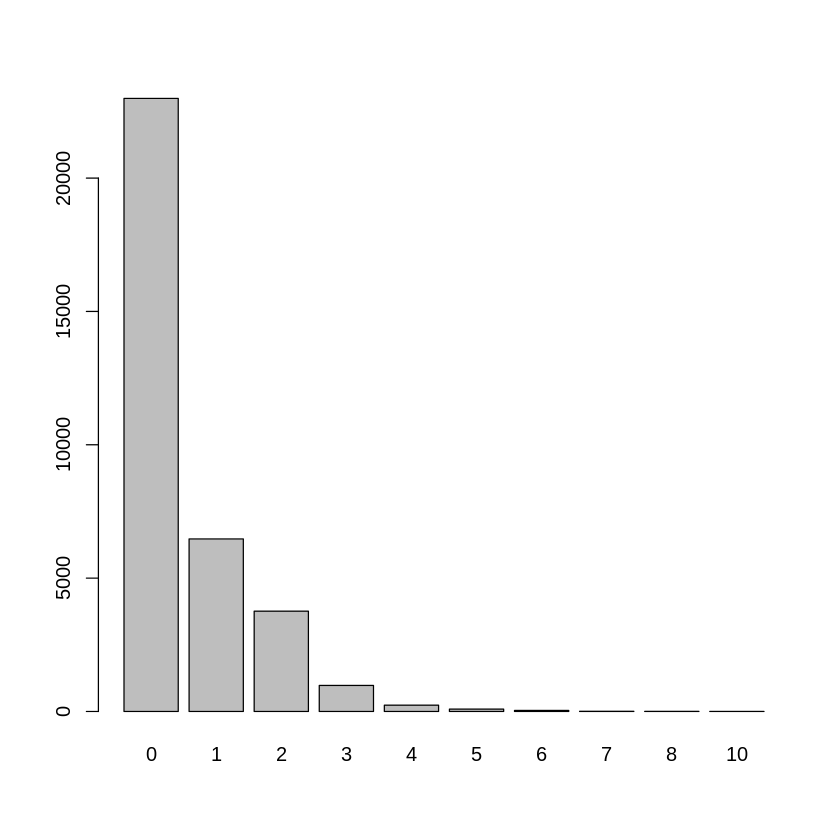

In [7]:
barplot(table(df$LOS_LT14))

Main assumption regarding Poisson distribution is that E(X) = Var(X). So, we may verify that prior modelling procedure.

In [8]:
mean(df$LOS_LT14) ## expected value (mean)
var(df$LOS_LT14) ## variance 

[1] 0.5384882

[1] 0.8173178

+ If Var(X) > E(X) - we observe OVERDISPERSION -- standard errors in the GLM will be underestimated (will be too low)
+ If Var(X) < E(X) - we observe UNDERDISPERSION -- standard errors in the GLM will be overestimated (will be too high).

What is the reason for overdispersion? Not meeting assumptions, and why? 

+ we may observe the same units several times,
+ we may not have whole information (so, have omitted variable problem),
+ our data is clustered i.e. records in our data are correlated.

So, what are the ways to tackle this problem:

1. start with GLM with Poisson distribution
2. calculate GLM with Quasi-Poisson (Negative-Binomial type 1) distribution
3. calculate GLM with Negative-Binomial (type 2) distribution
4. compare to choose the best model (based on some criteria)

In [11]:
model1 <- glm(formula = LOS_LT14 ~ factor(KLM) + I(DOCH/1000) + factor(WOJ), data = df, family = poisson())
summary(model1)


Call:
glm(formula = LOS_LT14 ~ factor(KLM) + I(DOCH/1000) + factor(WOJ), 
    family = poisson(), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.9873  -1.0487  -0.8971   0.5406   5.6268  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.289887   0.037038 -34.826  < 2e-16 ***
factor(KLM)2   0.167051   0.041082   4.066 4.78e-05 ***
factor(KLM)3   0.381079   0.042507   8.965  < 2e-16 ***
factor(KLM)4   0.367482   0.033046  11.120  < 2e-16 ***
factor(KLM)5   0.504183   0.035478  14.211  < 2e-16 ***
factor(KLM)6   0.789650   0.029568  26.706  < 2e-16 ***
I(DOCH/1000)   0.046142   0.001732  26.642  < 2e-16 ***
factor(WOJ)04  0.132122   0.041894   3.154  0.00161 ** 
factor(WOJ)06  0.015629   0.040571   0.385  0.70007    
factor(WOJ)08 -0.097482   0.055221  -1.765  0.07751 .  
factor(WOJ)10  0.003567   0.039565   0.090  0.92816    
factor(WOJ)12  0.115940   0.036849   3.146  0.00165 ** 
factor(WOJ)14  0.033038   0.03432

Because, we now that variace is higher than mean, standard errors presented above are underestimated / too optimistic / too low.

In [12]:
model2 <- glm(formula = LOS_LT14 ~ factor(KLM) + I(DOCH/1000) + factor(WOJ), data = df, family = quasipoisson())
summary(model2)


Call:
glm(formula = LOS_LT14 ~ factor(KLM) + I(DOCH/1000) + factor(WOJ), 
    family = quasipoisson(), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.9873  -1.0487  -0.8971   0.5406   5.6268  

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.289887   0.044469 -29.006  < 2e-16 ***
factor(KLM)2   0.167051   0.049325   3.387 0.000708 ***
factor(KLM)3   0.381079   0.051036   7.467 8.41e-14 ***
factor(KLM)4   0.367482   0.039677   9.262  < 2e-16 ***
factor(KLM)5   0.504183   0.042596  11.836  < 2e-16 ***
factor(KLM)6   0.789650   0.035501  22.243  < 2e-16 ***
I(DOCH/1000)   0.046142   0.002079  22.189  < 2e-16 ***
factor(WOJ)04  0.132122   0.050300   2.627 0.008626 ** 
factor(WOJ)06  0.015629   0.048711   0.321 0.748325    
factor(WOJ)08 -0.097482   0.066301  -1.470 0.141493    
factor(WOJ)10  0.003567   0.047503   0.075 0.940142    
factor(WOJ)12  0.115940   0.044242   2.621 0.008782 ** 
factor(WOJ)14  0.033038   0.

$$
\begin{cases}
Var(y) = \mu + \alpha \cdot \mu & \text{quasi-poisson (NB1)} \\
 Var(y) = \mu + \alpha \cdot \mu^2 & \text{negative-binomial}
\end{cases}
$$

Finally, let's fit negative-binomial type 2 distribution

In [13]:
model3 <- glm.nb(formula = LOS_LT14 ~ factor(KLM) + I(DOCH/1000) + factor(WOJ), data = df)
summary(model3)


Call:
glm.nb(formula = LOS_LT14 ~ factor(KLM) + I(DOCH/1000) + factor(WOJ), 
    data = df, init.theta = 1.036592139, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6311  -0.9415  -0.8087   0.3978   3.8667  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.456437   0.045458 -32.039  < 2e-16 ***
factor(KLM)2   0.193134   0.048639   3.971 7.16e-05 ***
factor(KLM)3   0.409644   0.050752   8.072 6.94e-16 ***
factor(KLM)4   0.403058   0.039147  10.296  < 2e-16 ***
factor(KLM)5   0.549699   0.042533  12.924  < 2e-16 ***
factor(KLM)6   0.835301   0.035279  23.677  < 2e-16 ***
I(DOCH/1000)   0.103547   0.004053  25.550  < 2e-16 ***
factor(WOJ)04  0.133128   0.052346   2.543 0.010983 *  
factor(WOJ)06  0.008977   0.050501   0.178 0.858909    
factor(WOJ)08 -0.106266   0.067645  -1.571 0.116199    
factor(WOJ)10 -0.001886   0.048593  -0.039 0.969038    
factor(WOJ)12  0.110936   0.045903   2.417 0.015660 *  
factor(WOJ)1

In order to select appropriate model we may use information criteria such as AIC or BIC.

In [14]:
BIC(model1, model3) ## we shoud select model with the lowest value of BIC

,df,BIC
,<dbl>,<dbl>
model1,22,70391.80
model3,23,67734.12


So, based on BIC we may say that NB type 2 regression fits the data better than Poission distribution.


To sum up, from the methodological point of view, our approach is incorrect because we have to processes:

1. decision to have children
2. decision to have next child

How we may approach this problem from econometric point of view? We may use the following models:

- zero-inflated poisson/negative binomial model
- hurdle model 